<a href="https://colab.research.google.com/github/mfernandes61/py-dropin-session/blob/main/pydropin_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Pull the Pima-Indians-Diabetes-Data using wget
!wget -O diabetes.csv https://gist.githubusercontent.com/SoumenAtta/e00bd5cb6ed13a983bf48b845325c837/raw/d5e3560b8bfe97ba126b5e94bed4487c2b1ed787/diabetes.csv

--2024-04-12 08:06:23--  https://gist.githubusercontent.com/SoumenAtta/e00bd5cb6ed13a983bf48b845325c837/raw/d5e3560b8bfe97ba126b5e94bed4487c2b1ed787/diabetes.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23105 (23K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  22.56K  --.-KB/s    in 0.002s  

2024-04-12 08:06:23 (14.5 MB/s) - ‘diabetes.csv’ saved [23105/23105]



In [2]:
import numpy as np
import pandas as pd
from pandas import read_csv

# Read data into python
pima = read_csv("diabetes.csv")

pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# give data the once-over
print(pima.shape)
print(pima.head)
print(pima.columns)

(768, 9)
<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.

In [4]:
# get summary statistics for our data
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# can we see any correlations in our data?
print(pima.corr(method ="pearson"))

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

If we just take these results at face value, there are some potential correlations (Pearson measures strength of linear relationship) with values above 0.4.   
Rather than trusting to summary statisics we should additionally perform graphical examination.

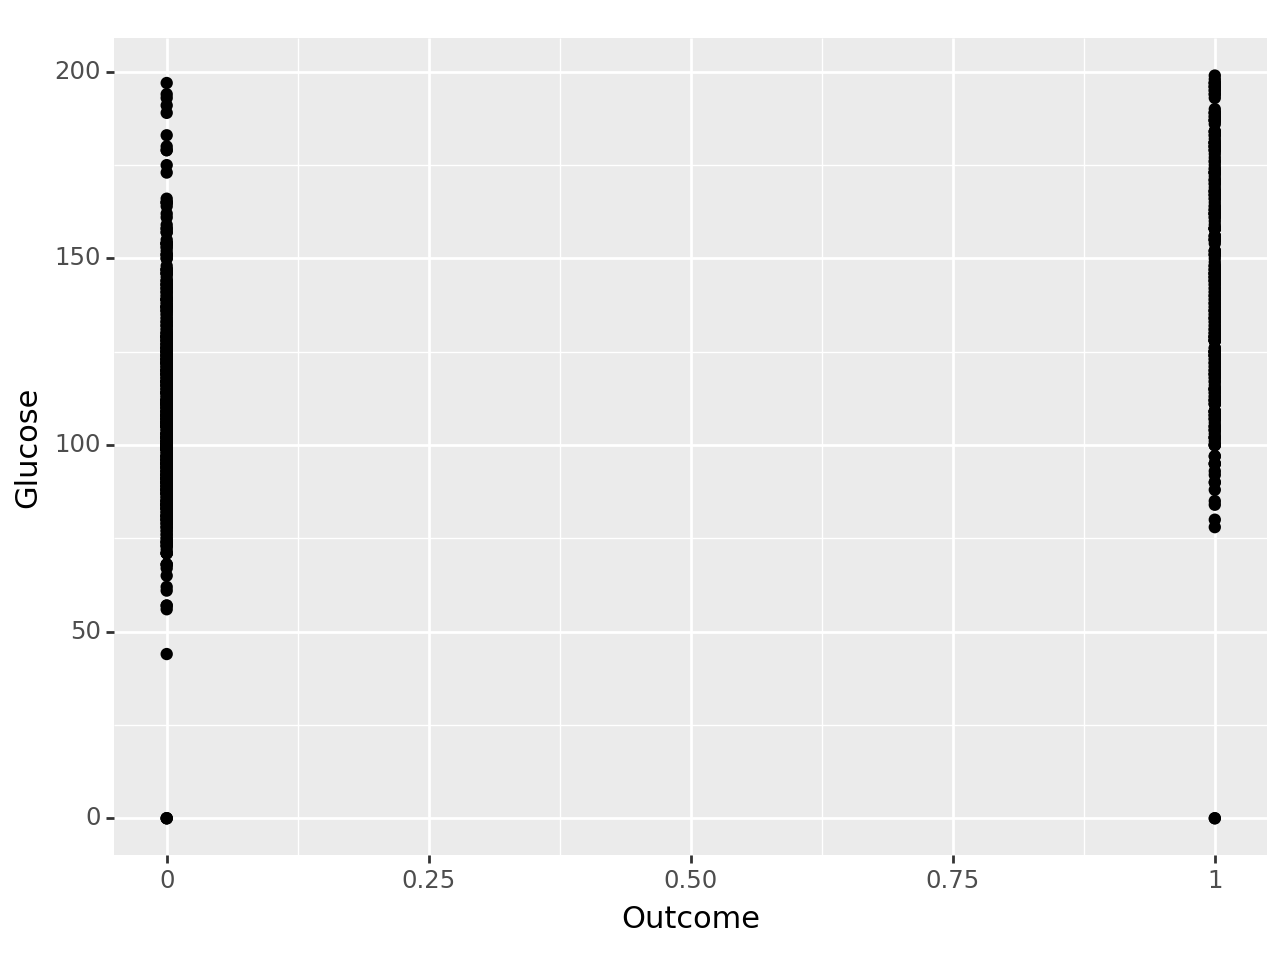

<Figure Size: (640 x 480)>

In [7]:
# plots using plotnine
%matplotlib inline
import plotnine as p9

(p9.ggplot(data=pima,
           mapping=p9.aes(x='Age', y='Pregnancies'))
    + p9.geom_point()
)


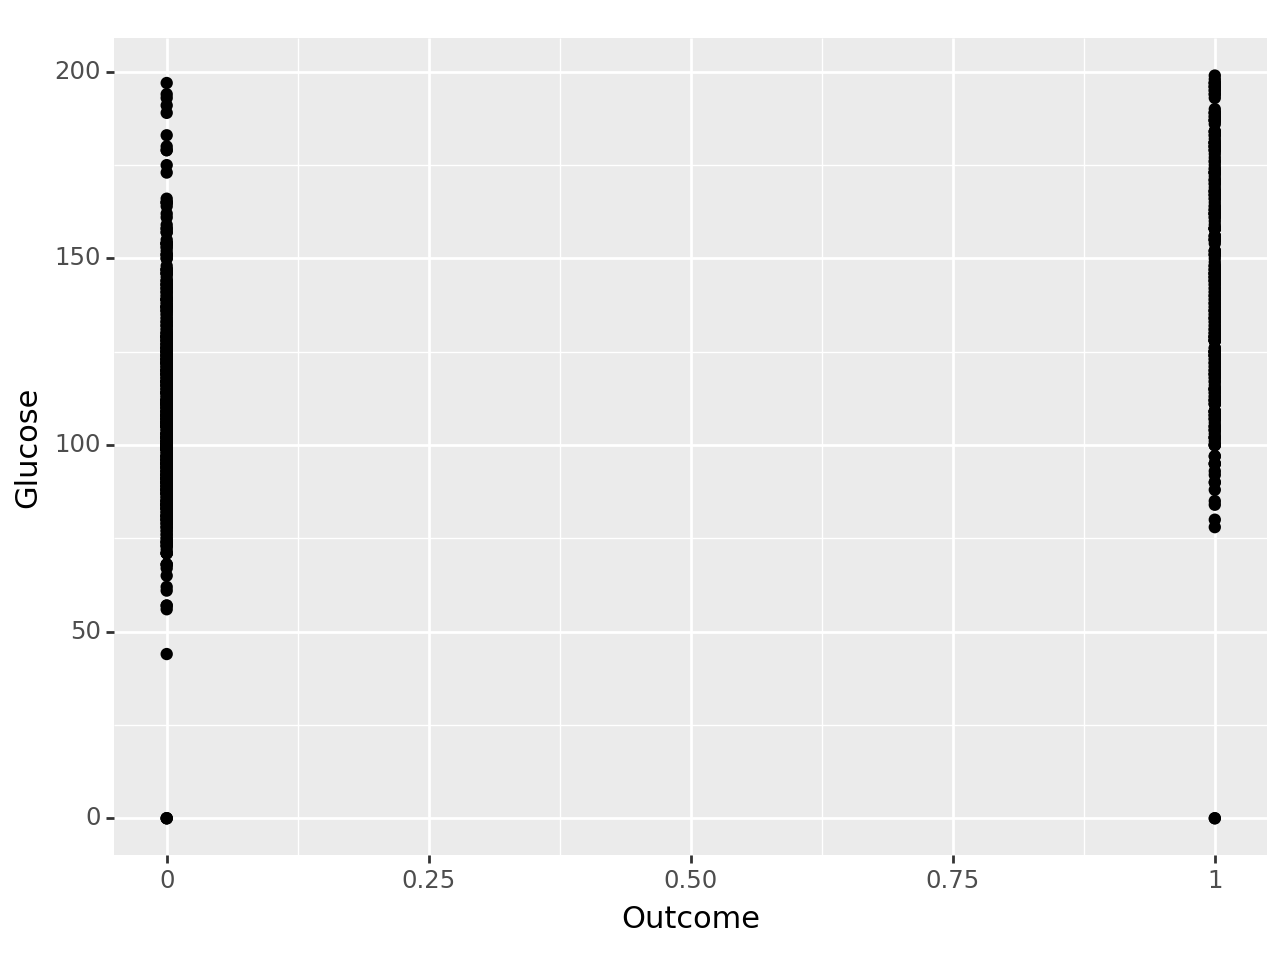

<Figure Size: (640 x 480)>

In [8]:

(p9.ggplot(data=pima,
           mapping=p9.aes(x='Outcome', y='Glucose'))
    + p9.geom_point()
)

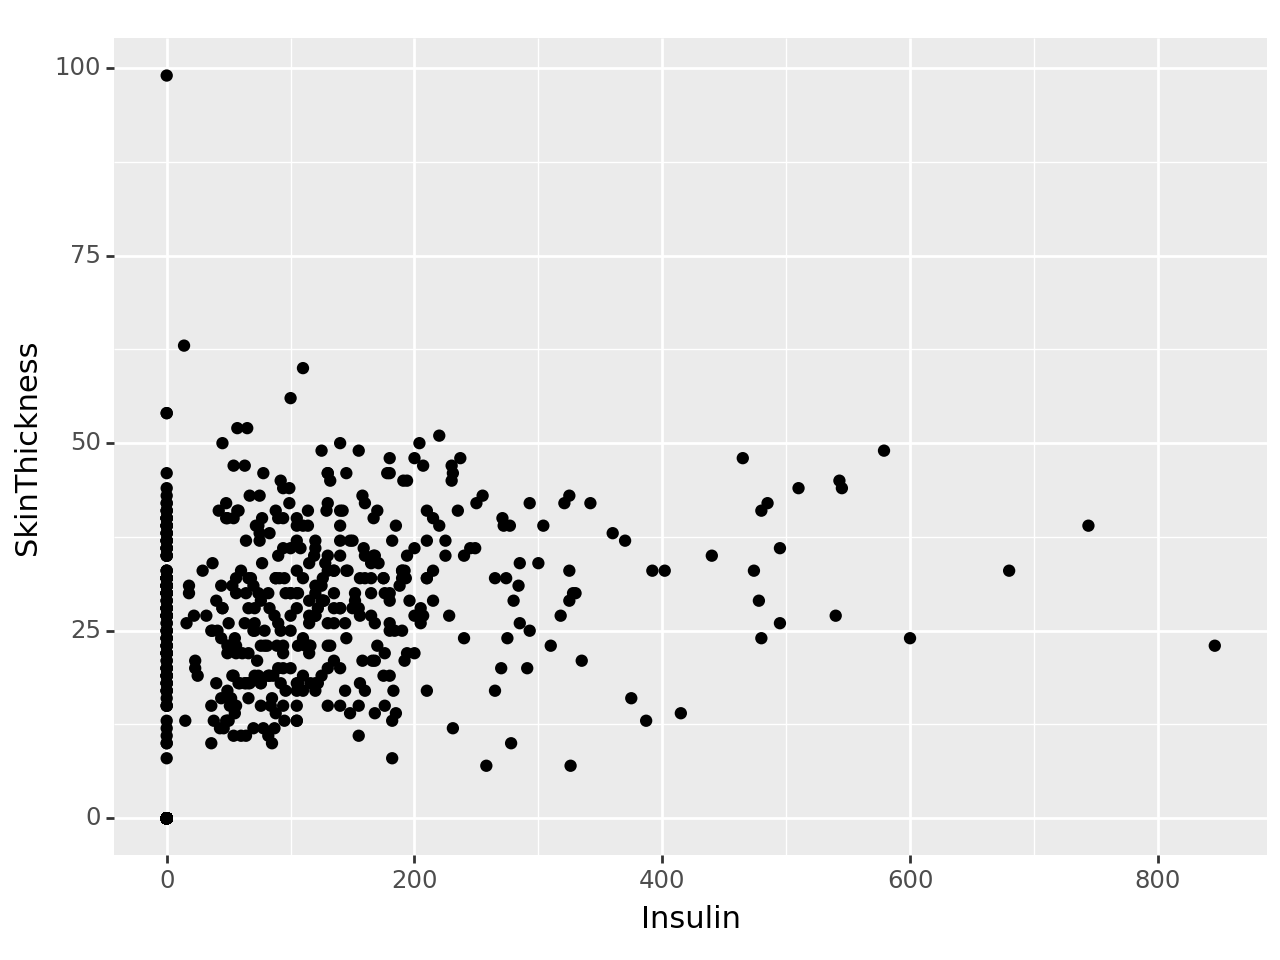

<Figure Size: (640 x 480)>

In [9]:

(p9.ggplot(data=pima,
           mapping=p9.aes(x='Insulin', y='SkinThickness'))
    + p9.geom_point()
)

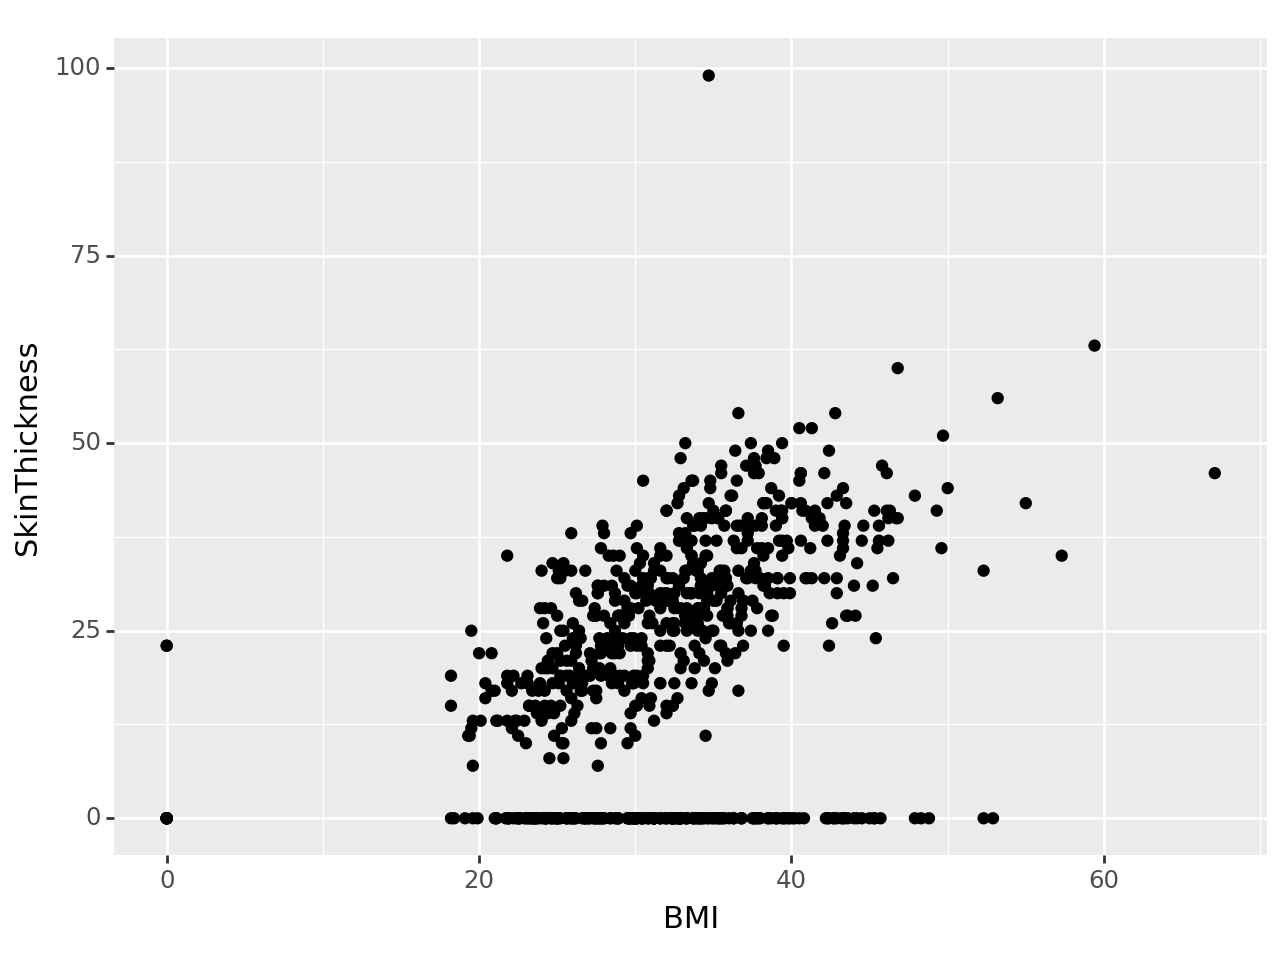

<Figure Size: (640 x 480)>

In [10]:

(p9.ggplot(data=pima,
           mapping=p9.aes(x='BMI', y='SkinThickness'))
    + p9.geom_point()
)

Does this last plot suggest a relationship?